**Numeryczne rozwiązywanie równań różniczkowych**\
Łukasz Jarzęcki 331697

In [151]:
import numpy as np
import re
from scipy.integrate import solve_ivp
import time
import matplotlib.pyplot as plt


0. **Metody pomocnicze**

In [152]:
def rysuj_wykres(t, euler_base, euler_mod, heun, rk, rk45, rozw_analityczne, h):
    plt.figure(figsize=(10, 6))
    
    plt.plot(t, rozw_analityczne, label='Rozwiązanie analityczne', color='black', linewidth=2)
    plt.plot(t, euler_base, label='Euler', color='red', linestyle='--')
    plt.plot(t, euler_mod, label='Zmodyfikowany Euler', color='blue', linestyle='-.')
    plt.plot(t, heun, label='Heun', color='green', linestyle=':')
    plt.plot(t, rk, label='rk4', color='purple')
    plt.plot(t, rk45, label='ode45 (RK45)', color='orange')

    plt.title(f'Porównanie metod numerycznych z rozwiązaniem analitycznym dla kroku {h}')
    plt.xlabel('x')
    plt.ylabel('y(x)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [170]:
def calc_max_error(x, y, g):
    max_error = -1

    for i in x.size:
        error = abs(g(x[i]) - y[i])
        if(error > max_error):
            max_error = error

    return error


1. **Implementacje metod**

1.1 **Metoda Eulera**

In [153]:
def euler_base(x0, y0, h0, f_par, iters):
    x = x0
    y = y0
    h = h0
    f = f_par

    x_vec = np.zeros(iters)
    y_vec = np.zeros(iters)
    x_vec[0] = x
    y_vec[0] = y


    for i in range(1, iters):
        y = y+h*f(x,y)
        x = x+h
        x_vec[i] = x
        y_vec[i] = y
        #print(f"{i}: x: {x}\t y: {y}")

    return y_vec


y = euler_base(1,0.5,0.1, lambda x,y: 3*x*y**2, 5)
print(y)

[0.5        0.575      0.68410625 0.85258674 1.13607936]


1.2 **Zmodyfikowana metoda Eulera**

In [154]:
def euler_mod(x0, y0, h0, f_par, iters):
    x = x0
    y = y0
    h = h0
    f = f_par

    x_vec = np.zeros(iters)
    y_vec = np.zeros(iters)
    x_vec[0] = x
    y_vec[0] = y

    for i in range(1, iters):
        y = y+h*f(x+0.5*h,y+0.5*h*f(x,y))
        x = x+h
        x_vec[i] = x
        y_vec[i] = y
        #print(f"{i}: x: {x}\t y: {y}")

    return y_vec

y = euler_mod(1,0.5,0.1, lambda x,y: 3*x*y**2, 5)
print(y)

[0.5        0.59100547 0.73615771 0.99680658 1.57087001]


1.3 **Metoda Rungego-Kutty**

In [155]:
def runge_kutty(x0, y0, h0, f_par, iters):
    x = x0
    y = y0
    h = h0
    f = f_par

    x_vec = np.zeros(iters)
    y_vec = np.zeros(iters)
    x_vec[0] = x
    y_vec[0] = y

    K1 = lambda x,y: f(x,y)
    K2 = lambda x,y: f(x+0.5*h, y+0.5*h*K1(x,y))
    K3 = lambda x,y: f(x+0.5*h, y+0.5*h*K2(x,y))
    K4 = lambda x,y: f(x+h, y+h*K3(x,y))

    for i in range(1, iters):
        k1_val = K1(x,y)
        k2_val = K2(x,y)
        k3_val = K3(x,y)
        k4_val = K4(x,y)

        #print(f"x = {x}, k1 = {k1_val}, k2 = {k2_val}, k3 = {k3_val}, k4 = {k4_val}")

        y = y + (h/6)*(k1_val + 2*k2_val+2*k3_val + k4_val)
        x = x+h
        x_vec[i] = x
        y_vec[i] = y
        #print(f"{i}: x: {x}\t y: {y}")

    return y_vec

y = runge_kutty(1,0.5,0.1, lambda x,y: 3*x*y**2, 5)
print(y)

[0.5        0.59346905 0.74624633 1.0360624  1.78167795]


1.4 **Metoda Heuna**

In [156]:
def heun(x0, y0, h0, f_par, iters):
    x = x0
    y = y0
    h = h0
    f = f_par

    x_vec = np.zeros(iters)
    y_vec = np.zeros(iters)
    x_vec[0] = x
    y_vec[0] = y

    for i in range(1, iters):
        y = y + 0.5*h* (f(x,y) + f(x+h,y+h*f(x,y)))
        x = x+h

        x_vec[i] = x
        y_vec[i] = y
        #print(f"{i}: x: {x}\t y: {y}")

    return y_vec

y = heun(1,0.5,0.1, lambda x,y: 3*x*y**2, 5)
print(y)

[0.5        0.59205312 0.74004802 1.00990937 1.6249196 ]


2. **Analiza i porównanie powyższych metod numerycznych w rozwiązywaniu zadanego równania różniczkowego**

Założenia

In [157]:
# wzór równania różniczkowego 
f = lambda x,y: (4*x)/((1+x**2)**(1/3))
# funkcja wyrażająca rozwiązanie analityczne
g = lambda x: 3*(1+x**2)**(2/3) - 2.772
#przedział
span = (-2,2)
#warunki początkowe
x0 = -2
y0 = 6

2.1 **krok = 0.5**

In [158]:
# kroki integracji
h = 0.5
iters = int(abs(span[1]-span[0])/h) + 1
x = np.linspace(span[0], span[1], int((span[1] - span[0]) / h) + 1)


In [159]:
y_euler_base_05 = euler_base(x0, y0, h, f, iters)
y_euler_mod_05 = euler_mod(x0, y0, h, f, iters)
y_heun_05 = heun(x0, y0, h, f, iters)
y_runge_kutty_05 = runge_kutty(x0, y0, h, f, iters)

y_rk45_05 = solve_ivp(f, span, [x0, y0], t_eval=x).y[1]

y_true_05 = []
for val in x:
    y_true_05.append(g(val))

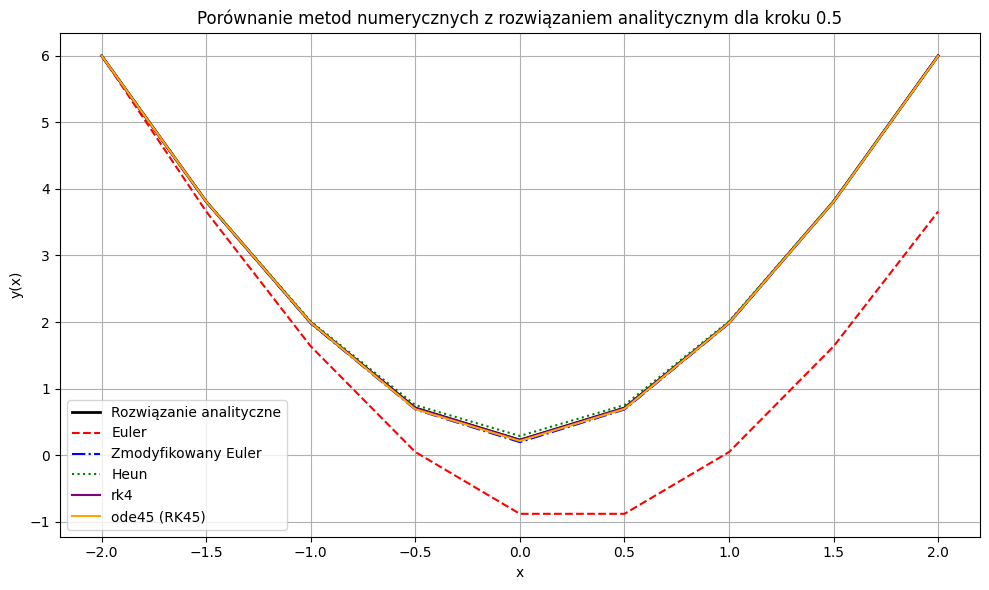

In [160]:
rysuj_wykres(x, y_euler_base_05, y_euler_mod_05, y_heun_05, y_runge_kutty_05, y_rk45_05, y_true_05, h)

2.2 **Krok = 0.1**

In [161]:
# kroki integracji
h = 0.1
iters = int(abs(span[1]-span[0])/h) + 1
x = np.linspace(span[0], span[1], int((span[1] - span[0]) / h) + 1)


In [162]:
y_euler_base_01 = euler_base(x0, y0, h, f, iters)
y_euler_mod_01 = euler_mod(x0, y0, h, f, iters)
y_heun_01 = heun(x0, y0, h, f, iters)
y_runge_kutty_01 = runge_kutty(x0, y0, h, f, iters)

y_rk45_01 = solve_ivp(f,t_span=span ,y0=[x0, y0], t_eval=x).y[1]

y_true_01 = []
for val in x:
    y_true_01.append(g(val))

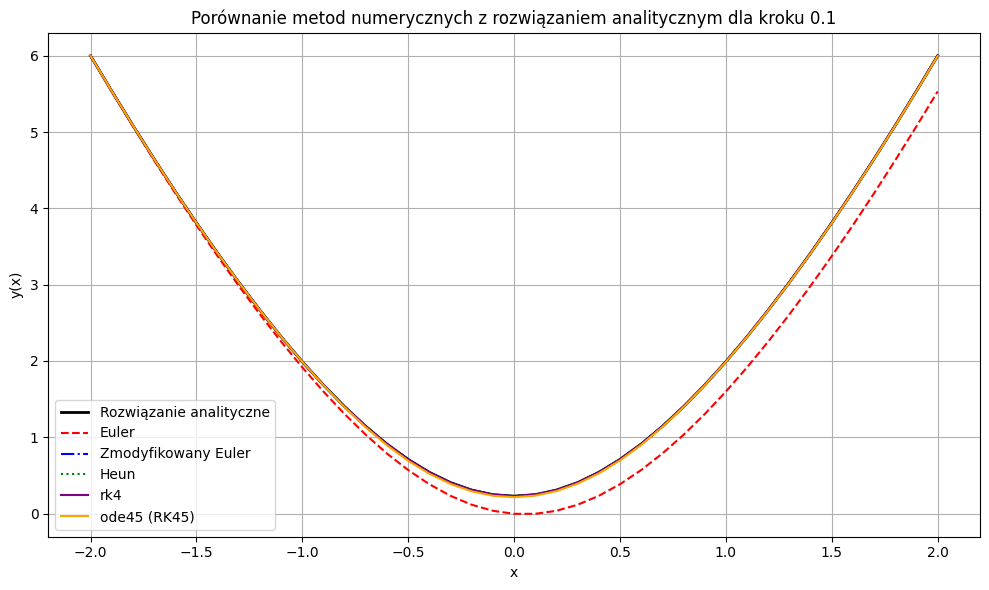

In [163]:
rysuj_wykres(x, y_euler_base_01, y_euler_mod_01, y_heun_01, y_runge_kutty_01, y_rk45_01, y_true_01, h)

2.3 **Krok = 0.01**

In [167]:
# kroki integracji
h = 0.01
iters = int(abs(span[1]-span[0])/h) + 1
x = np.linspace(span[0], span[1], int((span[1] - span[0]) / h) + 1)

In [168]:
y_euler_base_001 = euler_base(x0, y0, h, f, iters)
y_euler_mod_001 = euler_mod(x0, y0, h, f, iters)
y_heun_001 = heun(x0, y0, h, f, iters)
y_runge_kutty_001 = runge_kutty(x0, y0, h, f, iters)

y_rk45_001 = solve_ivp(f,t_span=span ,y0=[x0, y0], t_eval=x).y[1]

y_true_001 = []
for val in x:
    y_true_001.append(g(val))

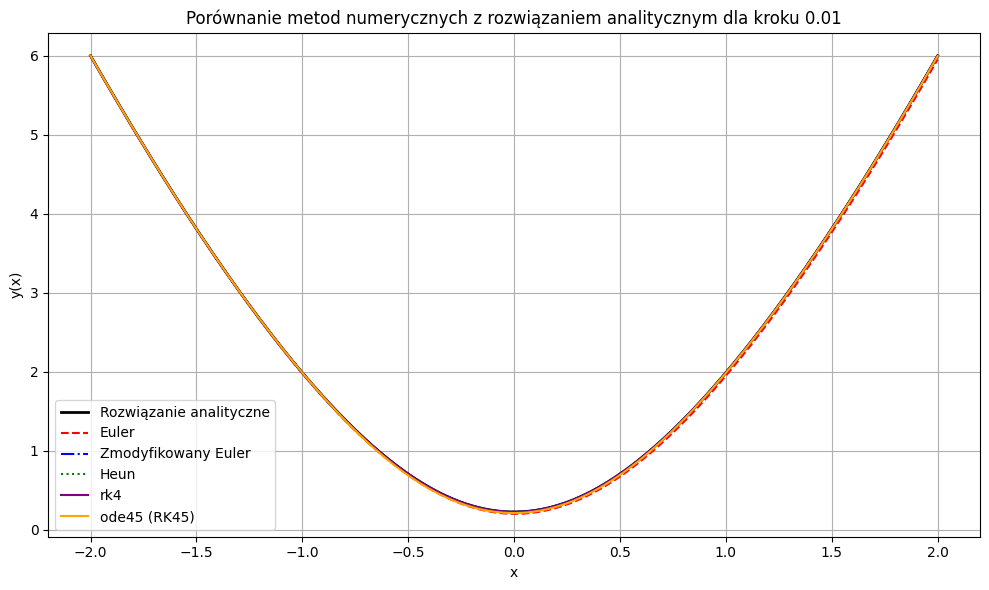

In [169]:
rysuj_wykres(x, y_euler_base_001, y_euler_mod_001, y_heun_001, y_runge_kutty_001, y_rk45_001, y_true_001, h)